In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay

In [71]:
url = ("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Employee_Attrition_Data_Set.csv")
df = pd.read_csv(url)

In [72]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [73]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


In [75]:
df.isnull().sum()

Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

<Axes: xlabel='Attrition', ylabel='Years at Company'>

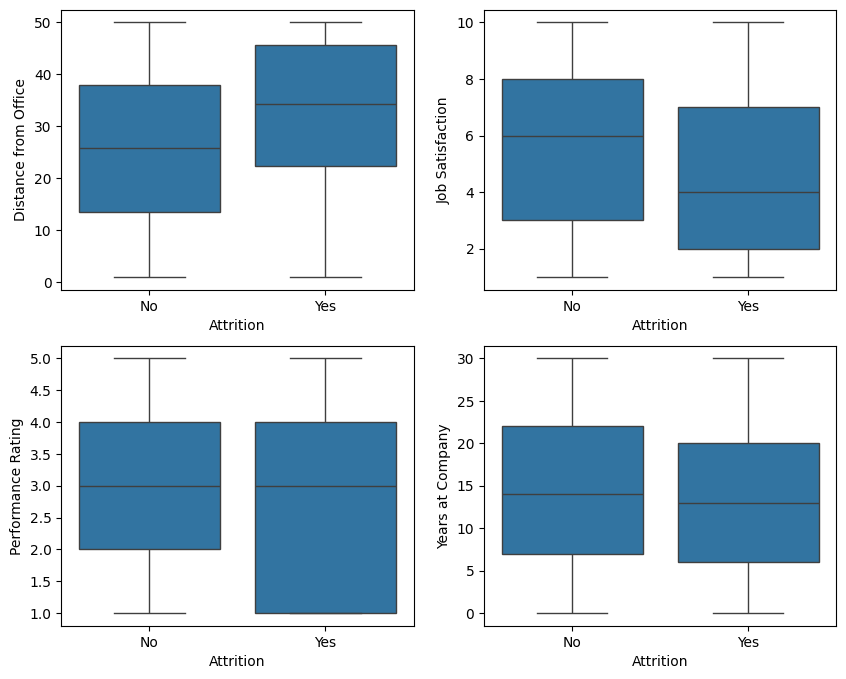

In [76]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='Attrition', y='Distance from Office', data=df, ax=ax1)
sns.boxplot(x='Attrition', y='Job Satisfaction', data=df, ax=ax2)
sns.boxplot(x='Attrition', y='Performance Rating', data=df, ax=ax3)
sns.boxplot(x='Attrition', y='Years at Company', data=df, ax=ax4)


<Axes: xlabel='Department', ylabel='count'>

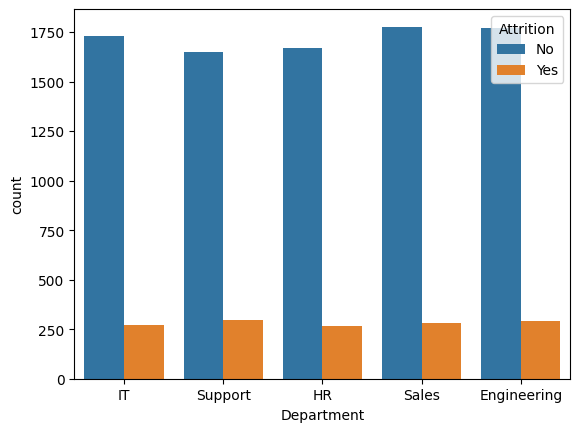

In [77]:
sns.countplot(x=df['Department'], hue=df['Attrition'])


<Axes: xlabel='Attrition'>

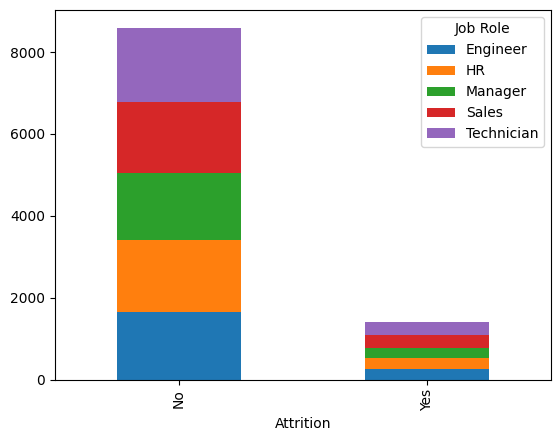

In [79]:
df.groupby(['Attrition','Job Role'])['Job Role'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Department', ylabel='count'>

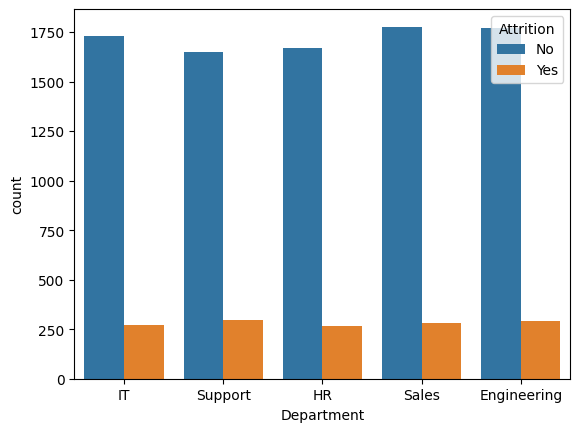

In [80]:
sns.countplot(x=df['Department'], hue=df['Attrition'])

<Axes: xlabel='Job Role', ylabel='count'>

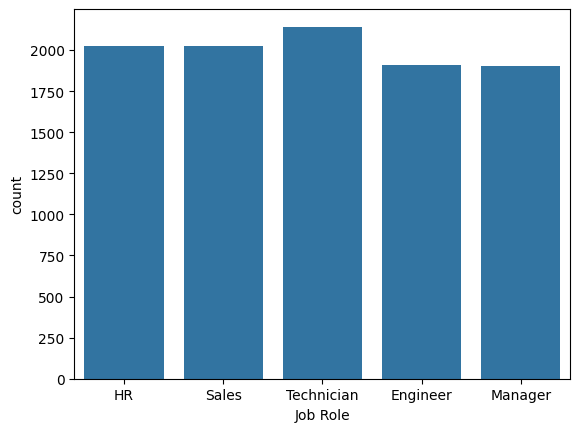

In [81]:
sns.countplot(x=df['Job Role'])

feature engineering

In [82]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Job Role', 'Department',
       'Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating', 'Attrition'],
      dtype='object')

In [116]:
df['output'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
model_data = df.drop(columns=['Attrition','Employee ID','Gender', 'Department'])

In [117]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

#label encode categorical data
le = LabelEncoder()
model_data['Job Role']=le.fit_transform(model_data['Job Role']).astype(int)
model_data

,Age,Job Role,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,output
0,50,1,11547,12,1,12.288783,41.307654,9,1,0
1,36,3,8643,28,4,3.496371,44.733204,8,1,1
2,29,4,12418,12,4,4.796945,18.646876,1,3,0
3,42,4,11441,25,1,10.310471,15.790848,8,4,0
4,40,0,9178,25,2,6.210127,41.239179,6,4,0
...,...,...,...,...,...,...,...,...,...,...
9995,26,3,6079,19,0,16.867011,34.311711,7,1,1
9996,41,3,12946,11,2,19.361893,9.009338,2,1,0
9997,35,4,12700,1,0,0.029159,12.949511,1,1,0
9998,53,0,12013,21,3,2.106378,50.000000,4,4,0


<Axes: >

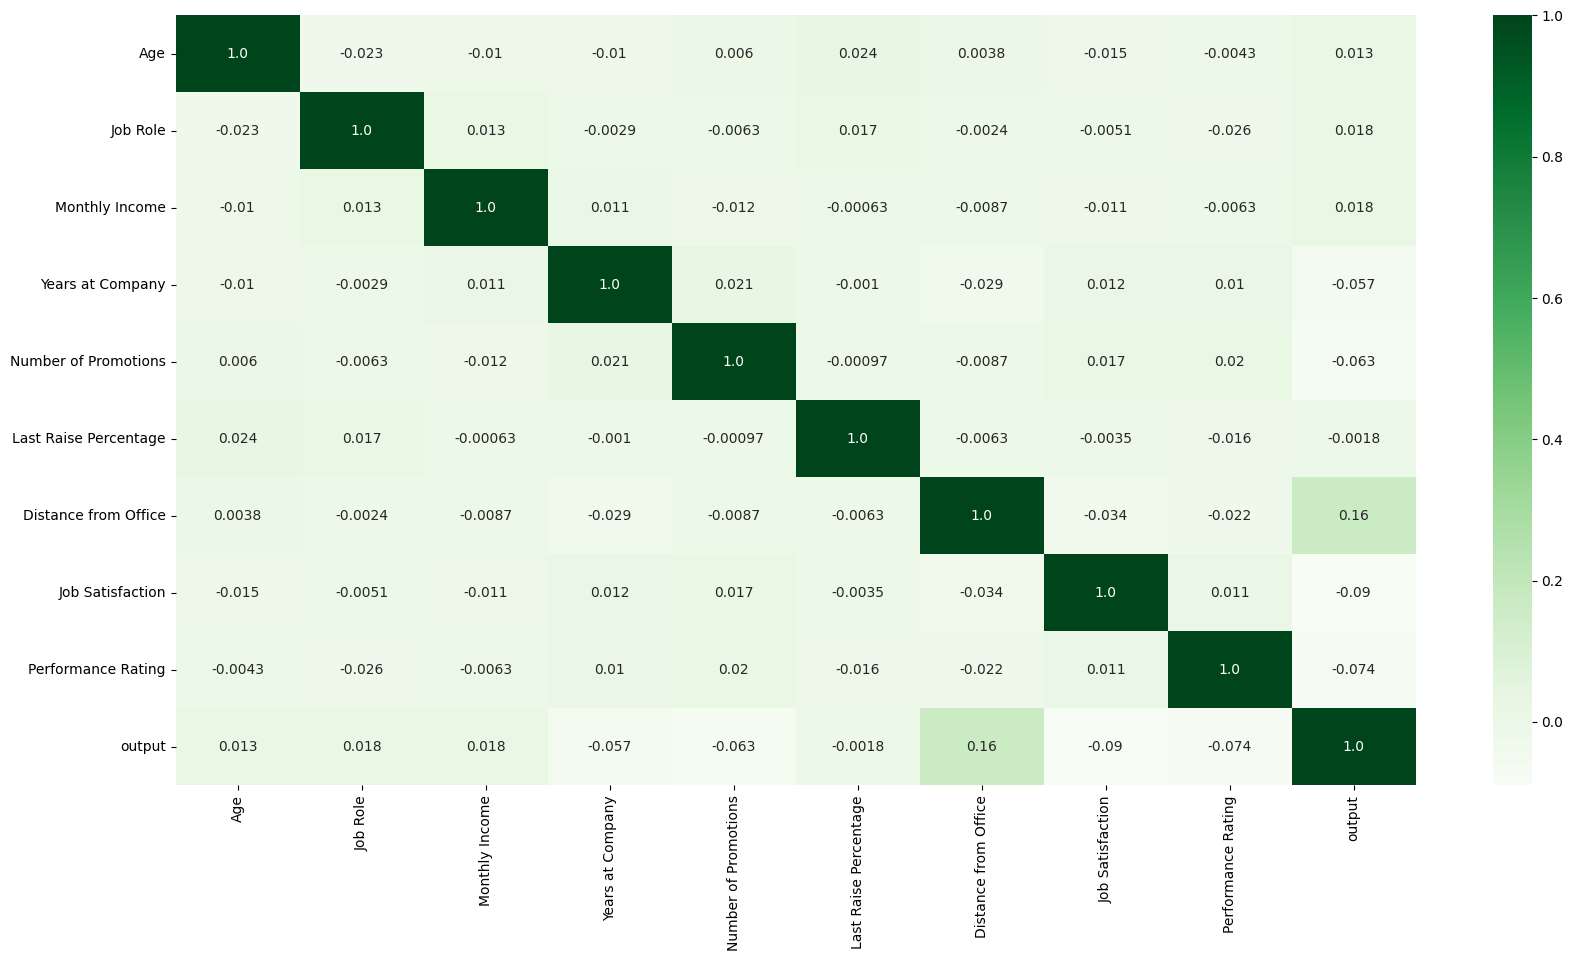

In [118]:
# visual representation of how numerical features are related to each other
num_feature = ['Age','Job Role','Monthly Income', 'Years at Company', 'Number of Promotions',
       'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction',
       'Performance Rating','output']

cor= model_data[num_feature].corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='Greens',fmt='.2')

Modeling

In [119]:
model_data['output'].value_counts()/len(model_data)

output
0    0.8597
1    0.1403
Name: count, dtype: float64

In [120]:
X = model_data.drop(columns=['output'])
y=model_data['output']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [128]:
model_data

,Age,Job Role,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,output
0,50,1,11547,12,1,12.288783,41.307654,9,1,0
1,36,3,8643,28,4,3.496371,44.733204,8,1,1
2,29,4,12418,12,4,4.796945,18.646876,1,3,0
3,42,4,11441,25,1,10.310471,15.790848,8,4,0
4,40,0,9178,25,2,6.210127,41.239179,6,4,0
...,...,...,...,...,...,...,...,...,...,...
9995,26,3,6079,19,0,16.867011,34.311711,7,1,1
9996,41,3,12946,11,2,19.361893,9.009338,2,1,0
9997,35,4,12700,1,0,0.029159,12.949511,1,1,0
9998,53,0,12013,21,3,2.106378,50.000000,4,4,0


In [125]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
rf = RandomForestClassifier()

In [131]:
knn_scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
rf_scores = cross_val_score(rf, X_train, y_train, scoring='f1', cv=5)

/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [132]:
print(f'Logistic Regression Mean F1 Score: {np.mean(logreg_scores)}')
print(f'K-Nearest Neighbors Mean F1 Score: {np.mean(knn_scores)}')
print(f'Random Forest Classifier Mean F1 Score: {np.mean(rf_scores)}')

Logistic Regression Mean F1 Score: 0.01617280648688595
K-Nearest Neighbors Mean F1 Score: 0.07318578872746231
Random Forest Classifier Mean F1 Score: 0.14726876568941805


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_churn.csv')

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize distribution of churn
sns.countplot(x='Churn', data=df)
plt.show()

# Visualize correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Hypothesis: Customers with lower tenure, fewer products, and lower balance are more likely to churn.


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
df[['Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['Age', 'Balance', 'EstimatedSalary']])

# Split data into features and target variable
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Fit and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} model trained.')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation function
def evaluate_model(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate all models
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model)
    print(f'{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


from sklearn.model_selection import GridSearchCV

# Assuming Logistic Regression performed the best
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Final model
best_model = grid_search.best_estimator_

# Evaluate final model
accuracy, precision, recall, f1 = evaluate_model(best_model)
print(f'Optimized Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')


In [ ]:
#side note on how to do pipline

# Splitting the data into features and target variable
X = data.drop(columns=['MadePurchase'])
y = data['MadePurchase']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_cols = ['Age', 'AnnualIncome', 'SpendingScore', 'PurchaseFrequency']
categorical_cols = ['Gender', 'ProductCategory']

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and combine preprocessing and modeling steps into a pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the pipeline
clf.fit(X_train, y_train)